In [ ]:
**This section is for getting the r code into a workable format, requires R installed locally**

In [91]:
import rpy2.robjects as robjects
rf = robjects.r.load('replication.RData')
applied_df = robjects.conversion.rpy2py(robjects.r['applied.data'])
match_df = robjects.r['match.data']
genmatch_vars_df = robjects.r['genmatch.covar']

applied_df.to_csv('applied_data.csv', index=False)
match_df.to_csv('match_data.csv', index=False)
genmatch_vars_df.to_csv('genmatch_covars.csv', index=False)

**The next section is the prep for the actual notebook**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

df = pd.read_csv('applied_data.csv')
df.head()

,municode,cand.id,uf,muni,name,party,yob,votes,elected,coal.votes,...,pending_yes,gini_2000,pt_pres_1998,income_2000,psdb_2000,latitude,longitude,hdi_2000,pop_2000,pt_pref_2000
0,272.0,269950.0,RO,CEREJEIRAS,IVETE KRUGER CARBONI,PFL,1959.0,156.0,0.0,1912.0,...,1.0,0.600,0.097432,253.917999,0.000000,-13.188889,60.812222,0.751,18243.880859,0.0
1,35.0,259758.0,RO,PORTO VELHO,FRANCISCO FERNANDO RODRIGUES ROCHA,PSDB,1956.0,673.0,0.0,20759.0,...,0.0,0.619,0.186628,305.204987,0.116537,-8.761945,63.903889,0.763,335338.906250,0.0
2,434.0,259951.0,RO,NOVA MAMORE,FRANCISCO ERASMO TAVEIRA DA SILVA,PP,1955.0,104.0,0.0,2025.0,...,1.0,0.695,0.063217,132.462006,0.000000,-10.401944,65.326668,0.659,14807.934570,0.0
3,434.0,261205.0,RO,NOVA MAMORE,GABRIEL JOSÉ DA SILVA,PFL,1967.0,54.0,0.0,2025.0,...,0.0,0.695,0.063217,132.462006,0.000000,-10.401944,65.326668,0.659,14807.934570,0.0
4,736.0,268283.0,RO,ALTO ALEGRE DOS PARECIS,AILTON ROQUE DE SOUZA,PSB,1965.0,49.0,0.0,543.0,...,0.0,0.518,0.103320,111.781998,0.350106,-12.128056,61.850555,0.674,12733.742188,0.0


`
reg.discont.plot(applied.data$post.approved[abs(applied.data$raw.vote.margin)<250], applied.data$raw.vote.margin[abs(applied.data$raw.vote.margin)<250], treat = applied.data$elected[abs(applied.data$raw.vote.margin)<250],bins=15, bw=1, SE=TRUE, y.max=1, y.min=0, xlab=expression(paste("Vote Margin, ",M[ij])), ylab= "Application Approved After Election", main= "Application Approved After Election")
`

Text(0.5, 1.0, 'Application Approved After Election')

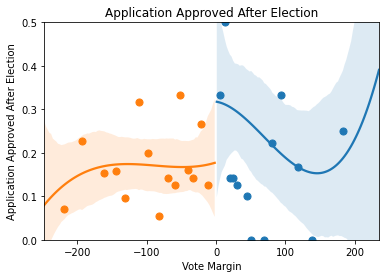

In [8]:
within_250 = abs(df['raw.vote.margin'])<250

sns.regplot(x='raw.vote.margin',y='post.approved', 
            data=df[within_250 & df['elected_bool']], x_ci=None, 
            order=3, x_bins=15)
sns.regplot(x='raw.vote.margin',y='post.approved', 
            data=df[within_250 & (~ df['elected_bool'])], x_ci=None, 
            order=3, x_bins=15)
plt.ylim(0,.5)
plt.ylabel('Application Approved After Election')
plt.xlabel('Vote Margin')
plt.title('Application Approved After Election')

`
reg.discont.plot(1-applied.data$pending_yes[abs(applied.data$raw.vote.margin)<250], applied.data$raw.vote.margin[abs(applied.data$raw.vote.margin)<250], treat=applied.data$elected[abs(applied.data$raw.vote.margin)<250],bins=15,bw=1, SE=TRUE,y.max=1,y.min=0, xlab=expression(paste("Vote Margin, ",M[ij])), ylab="Application Rejected After Election", main="Application Rejected After Election")
`

Text(0.5, 1.0, 'Application Approved After Election')

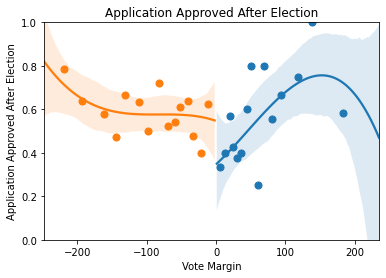

In [44]:
data = df[within_250 & (df['elected_bool'])]
sns.regplot(x=data['raw.vote.margin'],y=1-data['pending_yes'], 
              x_ci=None, order=3, x_bins=15)
data = df[within_250 & (~df['elected_bool'])]
sns.regplot(x=data['raw.vote.margin'],y=1-data['pending_yes'], 
              x_ci=None, order=3, x_bins=15)
plt.ylim(0,1)
plt.ylabel('Application Approved After Election')
plt.xlabel('Vote Margin')
plt.title('Application Approved After Election')

In [53]:
df.columns.values
df['pre.approved']

array([0.])

In [71]:
#!pip install pymatch
match_df = pd.read_csv('match_data.csv')
match_df['pctVV']

0       6.130000
1       2.690621
2       1.598272
3       2.720000
4       0.880000
          ...   
1450    4.380000
1451    3.830000
1452    4.740000
1453    1.570000
1454    2.510000
Name: pctVV, Length: 1455, dtype: float64

In [72]:
from pymatch.Matcher import Matcher

In [79]:
Matcher(match_df['pctVV'][match_df['treat'].astype(bool)].astype(int), match_df['pctVV'][~match_df['treat'].astype(bool)].astype(int))

TypeError: __init__() missing 1 required positional argument: 'yvar'

In [96]:
match_df['pctVV'][match_df['treat'].astype(bool)].mean()-match_df['pctVV'][~match_df['treat'].astype(bool)].mean()

0.45292954990334966

In [121]:
import statsmodels.formula.api as smf
d = pd.concat([match_df, genmatch_vars_df], axis=1)
d = d.loc[:,~d.columns.duplicated()]
t = d[d['treat'].astype(bool)]
u = d[~d['treat'].astype(bool)]
t

,muni,municode,uf,party,male,occ,edu,yob,votes,elected,...,match.partyPSB,match.partyPSC,match.partyPSDB,match.partyPSDC,match.partyPSL,match.partyPT,match.partyPTB,match.partyPV,eduMore.than.Primary..Less.than.Superior,eduSome.Superior.or.More
1,ALTA FLORESTA DO OESTE,310.0,RO,PSL,0.0,Education,"More than Primary, Less than Superior",1960.0,908,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,CORUMBIARA,655.0,RO,PMDB,1.0,Agriculture,"More than Primary, Less than Superior",1943.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,JARU,159.0,RO,PT,1.0,Agriculture,"More than Primary, Less than Superior",1968.0,558,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13,CHUPINGUAIA,809.0,RO,PMDB,1.0,Media,Less than Primary,1968.0,38,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,MIRANTE DA SERRA,574.0,RO,PDT,1.0,Blue collar,Less than Primary,1967.0,120,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,PONTALINA,95494.0,GO,PSDB,0.0,White collar,"More than Primary, Less than Superior",1957.0,45,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1495,SERRANOPOLIS,96075.0,GO,PMDB,1.0,White collar,Less than Primary,1944.0,214,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,SERRANÓPOLIS,96075.0,GO,PMDB,1.0,Other,Less than Primary,1944.0,269,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1506,PEDRO RÉGIS,19747.0,PB,PTB,1.0,Government,"More than Primary, Less than Superior",1962.0,52,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [115]:
genmatch_vars_df.columns.values

array(['occBlue.collar', 'occEducation', 'occGovernment', 'occMedia',
       'occNone', 'occOther', 'occPolitician', 'occWhite.collar', 'lat',
       'long', 'ran.prior', 'incumbent', 'log.valid.votes',
       'party.prior.pctVV', 'prior.pctVV', 'elec.year', 'match.partyPCB',
       'match.partyPC.do.B', 'match.partyPDT', 'match.partyPFL',
       'match.partyPL', 'match.partyPMDB', 'match.partyPMN',
       'match.partyPP', 'match.partyPPS', 'match.partyPSB',
       'match.partyPSC', 'match.partyPSDB', 'match.partyPSDC',
       'match.partyPSL', 'match.partyPT', 'match.partyPTB',
       'match.partyPV', 'uf.rs', 'uf.sp', 'yob',
       'eduMore.than.Primary..Less.than.Superior',
       'eduSome.Superior.or.More', 'log.total.assets', 'pt_pres_1998',
       'psdb_2000', 'hdi_2000', 'income_2000', 'log.num.apps'],
      dtype=object)

In [123]:
from rpy2.robjects.packages import importr
matching = importr('Matching')

In [130]:
matching.Match(Y= match_df['pctVV'], Tr = match_df['treat'], X = genmatch_vars_df, BiasAdjust=False, caliper=[10]*43+[.5])

R[write to console]: Error in caliper[i] * sdX : non-numeric argument to binary operator



RRuntimeError: Error in caliper[i] * sdX : non-numeric argument to binary operator
